In [27]:
from tensorflow.keras import models,layers,losses,optimizers
import cv2
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [5]:
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

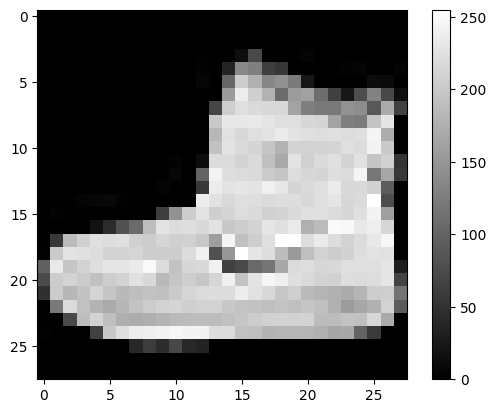

In [10]:
plt.imshow(x_train[0],cmap='gray')
plt.colorbar()

In [12]:
x_train=x_train/255.0
x_test=x_test/255.0

In [15]:
x_train=x_train.reshape(-1,28,28,1)

In [33]:
y_train_new=y_train.reshape(-1,1)
y_test_new=y_test.reshape(-1,1)
one=OneHotEncoder()
y_train_new=one.fit_transform(y_train_new).toarray()
y_test_new=one.fit_transform(y_test_new).toarray()

In [34]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),input_shape=(x_train.shape[1:]),activation='tanh'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(),
    layers.Conv2D(64,(3,3),activation='tanh'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
model.summary()

C:\Users\Shree\anaconda3\envs\computer_vision\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

# Using categorical cross entropy

In [35]:
loss_fun=losses.CategoricalCrossentropy()
opt=optimizers.Adam()
model.compile(optimizer=opt,loss=loss_fun,metrics=['accuracy'])

In [36]:
model.fit(x_train,y_train_new,batch_size=32,epochs=10,verbose=True,validation_data=(x_test,y_test_new))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 26ms/step - accuracy: 0.7653 - loss: 0.6417 - val_accuracy: 0.8631 - val_loss: 0.3878
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.8745 - loss: 0.3470 - val_accuracy: 0.8564 - val_loss: 0.3932
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.8864 - loss: 0.3057 - val_accuracy: 0.8738 - val_loss: 0.3452
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.8989 - loss: 0.2730 - val_accuracy: 0.8720 - val_loss: 0.3653
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9045 - loss: 0.2536 - val_accuracy: 0.8849 - val_loss: 0.3269
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9077 - loss: 0.2431 - val_accuracy: 0.8856 - val_loss: 0.3329
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9116 - loss: 0.2340 - val_accuracy: 0.8695 - val_loss: 0.3860
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.9188 -

In [38]:
model.evaluate(x_test,y_test_new)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8920 - loss: 0.3294
[0.3276093602180481, 0.8895000219345093]


In [42]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(y_test,y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.88      0.76      0.81      1000
           3       0.90      0.90      0.90      1000
           4       0.80      0.83      0.82      1000
           5       0.99      0.94      0.97      1000
           6       0.64      0.76      0.70      1000
           7       0.93      0.98      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Using Sparse Categorical cross entropy

In [43]:
loss_fun=losses.SparseCategoricalCrossentropy()
opt=optimizers.Adam()
model.compile(optimizer=opt,loss=loss_fun,metrics=['accuracy'])

In [46]:
model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),verbose=True)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9266 - loss: 0.1922 - val_accuracy: 0.8925 - val_loss: 0.3375
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 24ms/step - accuracy: 0.9275 - loss: 0.1901 - val_accuracy: 0.8841 - val_loss: 0.3732
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9291 - loss: 0.1886 - val_accuracy: 0.8886 - val_loss: 0.3565
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9303 - loss: 0.1829 - val_accuracy: 0.8922 - val_loss: 0.3574
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 24ms/step - accuracy: 0.9323 - loss: 0.1752 - val_accuracy: 0.8828 - val_loss: 0.4041
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9336 - loss: 0.1728 - val_accuracy: 0.8664 - val_loss: 0.4294
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9384 - loss: 0.1659 - val_accuracy: 0.8974 - val_loss: 0.3531
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 24ms/step - accuracy: 0.9358 -

In [47]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8969 - loss: 0.3813


[0.3763515055179596, 0.8952999711036682]

In [49]:
y_pred_2=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.88      0.76      0.81      1000
           3       0.90      0.90      0.90      1000
           4       0.80      0.83      0.82      1000
           5       0.99      0.94      0.97      1000
           6       0.64      0.76      0.70      1000
           7       0.93      0.98      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

